In [3]:
# !pip install pandas
# !pip install matplotlib
# !pip install sklearn
# !pip install seaborn

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

from sklearn.metrics import *
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [19]:
file = "C:\\Users\\SIMGEK\\Desktop\\BOUN\\Term_Project\\ml-100k\\"

genre_data = pd.read_excel(file + "u_genre.xlsx", names = ['name', 'id'])

movie_data_columns = np.append(['movie_id', 'title', 'release_date', 'video_release_date', 'url'], genre_data['name'].values)

movie_data  = pd.read_excel(file + "u_item.xlsx", names = movie_data_columns)

rating_data = pd.read_excel(file + "u_data.xlsx",names=['user_id', 'movie_id', 'rating', 'timestamp'])

user_data  = pd.read_excel(file + "u_user.xlsx",names=['user_id','age','gender','occupation','zip_code'])


In [20]:
rating_data.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [21]:
user_data.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [22]:
movie_data.head()

,movie_id,title,release_date,video_release_date,url,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [23]:
movie_data.isnull().any()

movie_id              False
title                 False
release_date           True
video_release_date     True
url                    True
unknown               False
Action                False
Adventure             False
Animation             False
Children's            False
Comedy                False
Crime                 False
Documentary           False
Drama                 False
Fantasy               False
Film-Noir             False
Horror                False
Musical               False
Mystery               False
Romance               False
Sci-Fi                False
Thriller              False
War                   False
Western               False
dtype: bool

In [24]:
movie_data[movie_data['release_date'].isnull()]

,movie_id,title,release_date,video_release_date,url,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
266,267,unknown,NaN,NaN,NaN,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
rating_data[rating_data['movie_id'] == 267]

,user_id,movie_id,rating,timestamp
2172,130,267,5,875801239
3781,5,267,4,875635064
7245,268,267,3,875742077
12475,297,267,3,875409139
14756,319,267,4,875707690
15292,1,267,4,875692955
49295,532,267,3,875441348
93523,833,267,1,875655669
99723,422,267,4,875655986


In [26]:
## Remove observations with movie_id = 267 since I do not want to suggest a movie with unknown details.

movie_data = movie_data[movie_data['movie_id'] != 267]
rating_data = rating_data[rating_data['movie_id'] != 267]

In [27]:
movie_data['release_date'] = pd.to_datetime(movie_data['release_date'])
movie_data['release_year'] = pd.DatetimeIndex(movie_data['release_date']).year
movie_data['movie_age'] = date.today().year - movie_data['release_year']
movie_data.drop('release_year', axis = 1, inplace = True)
movie_data.drop('release_date', axis = 1, inplace = True)

movie_data.set_index('movie_id', inplace= True)
movie_data['ratings_average'] = rating_data.groupby(['movie_id'])['rating'].mean()
movie_data['ratings_count'] = rating_data.groupby(['movie_id'])['rating'].count()
movie_data.reset_index(inplace= True)

movie_data.head()

,movie_id,title,video_release_date,url,unknown,Action,Adventure,Animation,Children's,Comedy,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,movie_age,ratings_average,ratings_count
0,1,Toy Story (1995),NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,25,3.878319,452
1,2,GoldenEye (1995),NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,1,0,0,25,3.206107,131
2,3,Four Rooms (1995),NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,1,0,0,25,3.033333,90
3,4,Get Shorty (1995),NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,25,3.550239,209
4,5,Copycat (1995),NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,1,0,0,25,3.302326,86


In [28]:
## Create Model DataFrame
model_df = rating_data.copy()

## Add user information
model_df['age'] = model_df['user_id'].map(dict(zip(user_data['user_id'],user_data['age'])))
model_df['gender'] = model_df['user_id'].map(dict(zip(user_data['user_id'],user_data['gender'])))
model_df['occupation'] = model_df['user_id'].map(dict(zip(user_data['user_id'],user_data['occupation'])))

## Add movie information
model_df['movie_title'] = model_df['movie_id'].map(dict(zip(movie_data['movie_id'],movie_data['title'])))

col = movie_data.columns.to_list()[5:]
for i in range(len(col)):
    model_df[str(col[i])] = model_df['movie_id'].map(dict(zip(movie_data['movie_id'],movie_data[col[i]])))

model_df.head()

,user_id,movie_id,rating,timestamp,age,gender,occupation,movie_title,Action,Adventure,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,movie_age,ratings_average,ratings_count
0,196,242,3,881250949,49,M,writer,Kolya (1996),0,0,...,0,0,0,0,0,0,0,23,3.991453,117
1,186,302,3,891717742,39,F,executive,L.A. Confidential (1997),0,0,...,0,1,0,0,1,0,0,23,4.161616,297
2,22,377,1,878887116,25,M,writer,Heavyweights (1994),0,0,...,0,0,0,0,0,0,0,26,2.153846,13
3,244,51,2,880606923,28,M,technician,Legends of the Fall (1994),0,0,...,0,0,1,0,0,1,1,26,3.456790,81
4,166,346,1,886397596,47,M,educator,Jackie Brown (1997),0,0,...,0,0,0,0,0,0,0,23,3.642857,126


In [29]:
model_df.shape

(99991, 29)

In [30]:
model_df['user_age_avg'] = model_df.groupby(['movie_id'])['age'].mean()

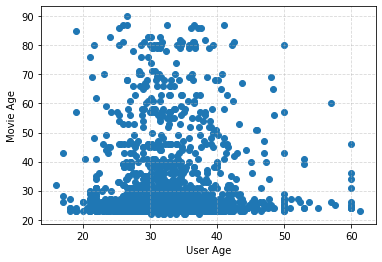

In [32]:
plt.scatter(model_df['user_age_avg'],model_df['movie_age'])
plt.xlabel('User Age')
plt.ylabel('Movie Age')
plt.grid('on', linestyle='--', alpha = 0.5)

#### Analysis of Movie Data

In [13]:
mov_df = model_df[['movie_id','movie_title','movie_age','ratings_average', 'ratings_count']].set_index('movie_id')
mov_df.head()

,movie_title,movie_age,ratings_average,ratings_count
movie_id,,,,
242,Kolya (1996),23,3.991453,117
302,L.A. Confidential (1997),23,4.161616,297
377,Heavyweights (1994),26,2.153846,13
51,Legends of the Fall (1994),26,3.456790,81
346,Jackie Brown (1997),23,3.642857,126


In [14]:
mov_df[['ratings_average', 'ratings_count','movie_age']].describe(i/100 for i in range(0,100, 10))

,ratings_average,ratings_count,movie_age
count,99991.000000,99991.000000,99991.000000
mean,3.529868,168.086218,32.043784
std,0.516734,121.780688,14.155523
min,1.000000,1.000000,22.000000
0%,1.000000,1.000000,22.000000
10%,2.814815,34.000000,23.000000
20%,3.122222,60.000000,24.000000
30%,3.313953,85.000000,24.000000
40%,3.463768,116.000000,25.000000
50%,3.601504,145.000000,26.000000


Movies are generally old movies with mean age of 32.
There are movies with rated only a few times, but more than 10% of the movies are rated at least 34 times.
Average movie rating is 3.52. When we checked the distribution of the movie ratings_average, we can see that users tend to rate around 3.

In order to teach the system with more popular items, 10% of the movies can be cut.

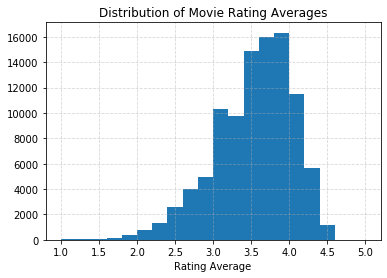

In [15]:
mov_df['ratings_average'].hist(bins=20)
plt.xlabel('Rating Average')
plt.title('Distribution of Movie Rating Averages')
plt.grid('on', linestyle='--', alpha = 0.5)

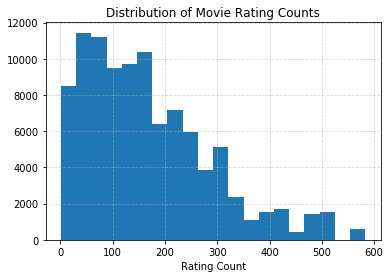

In [16]:
mov_df['ratings_count'].hist(bins=20)
plt.xlabel('Rating Count')
plt.title('Distribution of Movie Rating Counts')
plt.grid('on', linestyle='--', alpha = 0.5)

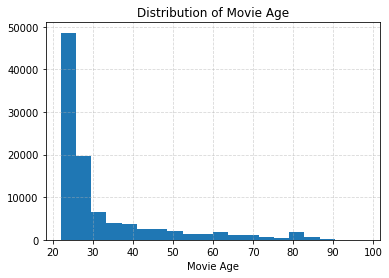

In [17]:
mov_df['movie_age'].hist(bins=20)
plt.xlabel('Movie Age')
plt.title('Distribution of Movie Age')
plt.grid('on', linestyle='--', alpha = 0.5)

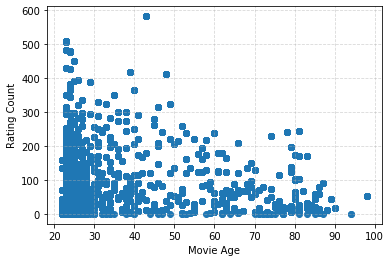

In [18]:
plt.scatter(mov_df['movie_age'],mov_df['ratings_count'])
plt.xlabel('Movie Age')
plt.ylabel('Rating Count')
plt.grid('on', linestyle='--', alpha = 0.5)

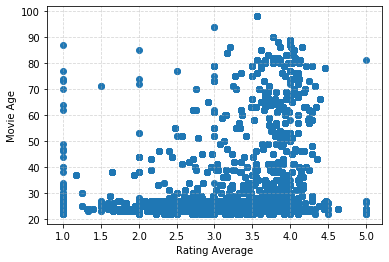

In [19]:
plt.scatter(mov_df['ratings_average'],mov_df['movie_age'])
plt.xlabel('Rating Average')
plt.ylabel('Movie Age')
plt.grid('on', linestyle='--', alpha = 0.5)

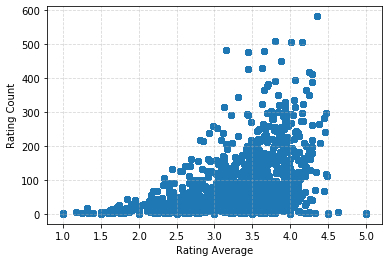

In [20]:
plt.scatter(mov_df['ratings_average'],mov_df['ratings_count'])
plt.xlabel('Rating Average')
plt.ylabel('Rating Count')
plt.grid('on', linestyle='--', alpha = 0.5)

There is not any specific correlation between movie_age and rating_counts.
People are generally gave 5 star to newer films. For other rating averages, there is not any specific correlation.
We can see that people tend to gave rating when they more like the films.

In [21]:
del mov_df

#### Analysis of User Data

In [144]:
num_users = len(rating_data.user_id.unique())
num_movie = len(rating_data.movie_id.unique())
print('There are {} unique users and {} unique movies in this data set'.format(num_users, num_movie))

There are 943 unique users and 1681 unique movies in this data set


In [145]:
rating_counts = pd.DataFrame(rating_data.groupby('rating').size(), columns=['count'])
rating_counts

,count
rating,
1,6109
2,11370
3,27142
4,34170
5,21200


In [146]:
total_cnt = num_users * num_movie
rating_zero_cnt = total_cnt - rating_data.shape[0]
# append counts of zero rating to df_ratings_cnt
df_ratings_cnt = rating_counts.append(pd.DataFrame({'count': rating_zero_cnt}, index=[0.0]),
    verify_integrity=True,).sort_index()
df_ratings_cnt['log_count'] = np.log(df_ratings_cnt['count'])
df_ratings_cnt

,count,log_count
0.0,1485192,14.211055
1.0,6109,8.717518
2.0,11370,9.338734
3.0,27142,10.208838
4.0,34170,10.439103
5.0,21200,9.961756


Text(0, 0.5, 'Number of Ratings')

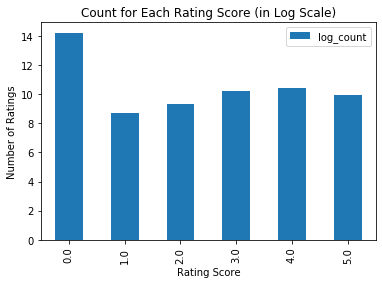

In [147]:
plt = df_ratings_cnt.reset_index().rename(columns={'index': 'rating score'}).plot(
    x='rating score',
    y='log_count',
    kind='bar',
    title='Count for Each Rating Score (in Log Scale)')

plt.set_xlabel("Rating Score")
plt.set_ylabel("Number of Ratings")

Not every movies are rated by every users. 
3 and 4 are the mostly given scores.

In [148]:
model_df.set_index('user_id', inplace = True)
model_df['user_movie_count'] = model_df.groupby(['user_id'])['movie_id'].count()
model_df['user_rating_avg'] = model_df.groupby(['user_id'])['rating'].mean()
model_df.reset_index(inplace = True)

In [165]:
user_df = model_df[['user_id','age','gender','occupation', 'user_movie_count','user_rating_avg']].set_index('user_id')
user_df.head()

,age,gender,occupation,user_movie_count,user_rating_avg
user_id,,,,,
196,49,M,writer,39,3.615385
186,39,F,executive,92,3.413043
22,25,M,writer,128,3.351562
244,28,M,technician,238,3.651261
166,47,M,educator,20,3.550000


In [171]:
user_df.reset_index()[['user_id', 'user_movie_count']].describe(i/100 for i in range(0,100, 10))

,user_id,user_movie_count
count,99991.000000,99991.000000
mean,462.498305,201.986769
std,266.612120,139.226258
min,1.000000,20.000000
0%,1.000000,20.000000
10%,94.000000,45.000000
20%,201.000000,75.000000
30%,293.000000,111.000000
40%,369.000000,145.000000
50%,447.000000,181.000000


Users gave min 20 ratings to movies.

In [152]:
user_df.reset_index().groupby(['gender'])['user_id'].count()

gender
F    25738
M    74253
Name: user_id, dtype: int64

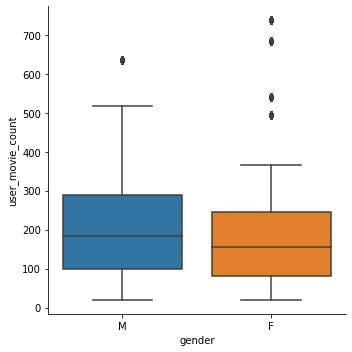

In [25]:
sns.catplot(x="gender", y="user_movie_count",kind="box", data=user_df);

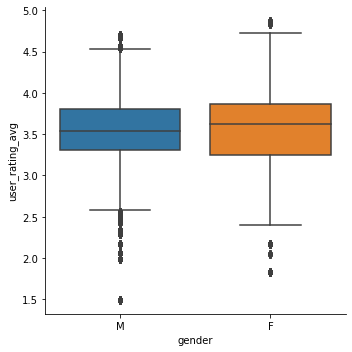

In [26]:
sns.catplot(x="gender", y="user_rating_avg",kind="box", data=user_df);

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 <a list of 21 Text xticklabel objects>)

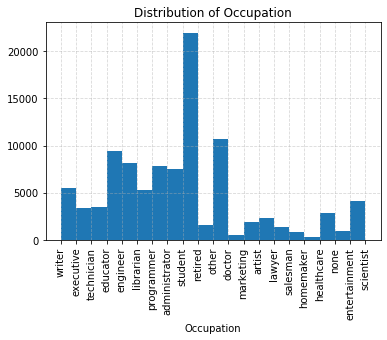

In [27]:
user_df['occupation'].hist(bins=20)
plt.xlabel('Occupation')
plt.title('Distribution of Occupation')
plt.grid('on', linestyle='--', alpha = 0.5)
plt.xticks(rotation='vertical')

In [28]:
user_df.reset_index().groupby(['occupation'])['user_id'].count()

occupation
administrator     7479
artist            2308
doctor             540
educator          9441
engineer          8174
entertainment     2094
executive         3403
healthcare        2804
homemaker          299
lawyer            1345
librarian         5273
marketing         1950
none               900
other            10662
programmer        7800
retired           1609
salesman           856
scientist         2058
student          21956
technician        3505
writer            5535
Name: user_id, dtype: int64

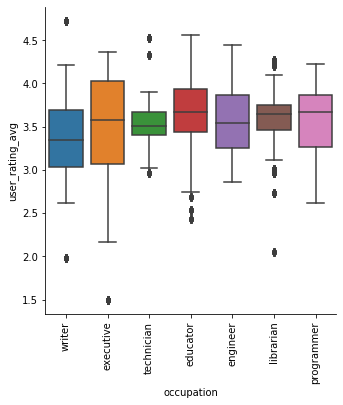

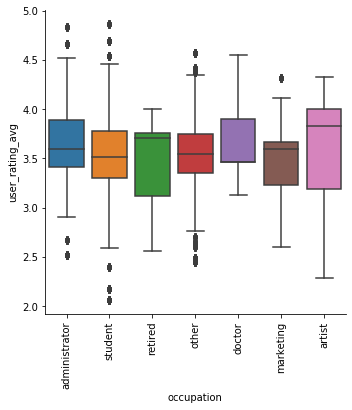

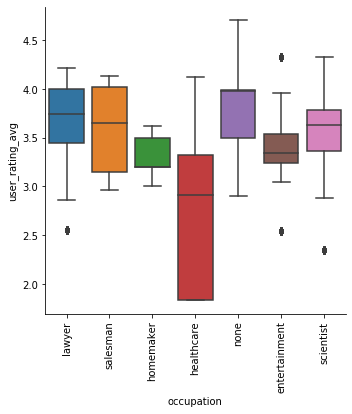

In [29]:
occ1 = user_df.reset_index()['occupation'].unique()[0:7]
occ2 = user_df.reset_index()['occupation'].unique()[7:14]
occ3 = user_df.reset_index()['occupation'].unique()[14:]

user1 = user_df[user_df['occupation'].isin(occ1)]
user2 = user_df[user_df['occupation'].isin(occ2)]
user3 = user_df[user_df['occupation'].isin(occ3)]

sns.catplot(x="occupation", y="user_rating_avg",kind="box", data=user1)
plt.xticks(rotation=90)

sns.catplot(x="occupation", y="user_rating_avg",kind="box", data=user2)
plt.xticks(rotation=90)

sns.catplot(x="occupation", y="user_rating_avg",kind="box", data=user3)
plt.xticks(rotation=90)

del occ1, occ2, occ3
del user1, user2, user3


There are 74.253 male, 25.738 female users. Male users tend to give more ratings.
Average user rating is 3.5 for both male and female users but when we checked the Q1 and Q3, male users rating average range is narrower from 2.5 to 4.5. Also there are more lower outlier values for male users which shows they tend to give lower ratings.

When we look at rating averages by occupation, healthcare personel gave less ratings than other occupations.

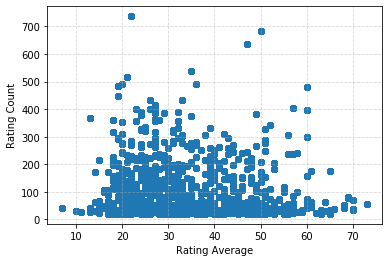

In [30]:
plt.scatter(user_df['age'],user_df['user_movie_count'])
plt.xlabel('Rating Average')
plt.ylabel('Rating Count')
plt.grid('on', linestyle='--', alpha = 0.5)

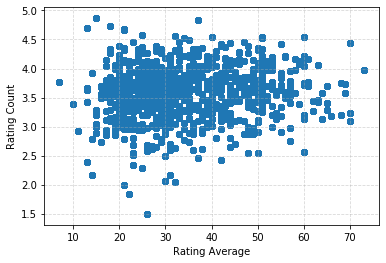

In [31]:
plt.scatter(user_df['age'],user_df['user_rating_avg'])
plt.xlabel('Rating Average')
plt.ylabel('Rating Count')
plt.grid('on', linestyle='--', alpha = 0.5)

When we looked at scatter plots, there is not any relation between age and rate count or age and rating average.

In [32]:
del user_df

#### Analysis by Genre

In [33]:
movies_df = movie_data[['movie_id', 'title','Action',
       'Adventure', 'Animation', "Children's", 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']].set_index('movie_id')

movies_dict = movies_df.to_dict('index')

In [34]:
genre={}
for key, value in movies_dict.items():
    val_list = []
    for i in value:
        if value[i] == 1:
            val_list.append(i)
            genre[key] = val_list

In [70]:
df = movie_data[['movie_id','title','ratings_average']].set_index('movie_id')
df["genres"] = df.index.to_series().map(genre)
df.sort_values(by=['movie_id']).head()

,title,ratings_average,genres
movie_id,,,
1,Toy Story (1995),3.878319,"[Animation, Children's, Comedy]"
2,GoldenEye (1995),3.206107,"[Action, Adventure, Thriller]"
3,Four Rooms (1995),3.033333,[Thriller]
4,Get Shorty (1995),3.550239,"[Action, Comedy, Drama]"
5,Copycat (1995),3.302326,"[Crime, Drama, Thriller]"


In [93]:
genres = []
ratings = []

for i in movies_df.iloc[:, 1:19].columns:
    mask = df['genres'].apply(lambda x: i in str(x))
    ratings = df[mask].ratings_average.to_list()
    genres.append({'Genres':i,
                  'Ratings': ratings})

In [101]:
Genres = pd.DataFrame.from_dict(genres)
Genres['Avg_Rating_by_Genre'] = Genres['Ratings'].apply(lambda x: sum(x)/len(x))
Genres.sort_values(by=['Avg_Rating_by_Genre'])

,Genres,Ratings,Avg_Rating_by_Genre
10,Horror,"[3.119565217391304, 3.0, 3.26027397260274, 3.2...",2.730157
8,Fantasy,"[3.193798449612403, 3.5, 2.966666666666667, 2....",2.849830
3,Children's,"[3.8783185840707963, 3.9954337899543377, 2.181...",2.916885
0,Action,"[3.2061068702290076, 3.550239234449761, 3.1195...",2.966332
4,Comedy,"[3.8783185840707963, 3.550239234449761, 3.9954...",3.000565
15,Thriller,"[3.2061068702290076, 3.033333333333333, 3.3023...",3.136692
1,Adventure,"[3.2061068702290076, 2.761904761904762, 3.4482...",3.143967
14,Sci-Fi,"[3.798469387755102, 3.0083333333333333, 3.2643...",3.165446
17,Western,"[3.45679012345679, 3.46875, 3.79296875, 3.8613...",3.185617
7,Drama,"[3.550239234449761, 3.302325581395349, 3.57692...",3.187353


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 <a list of 18 Text xticklabel objects>)

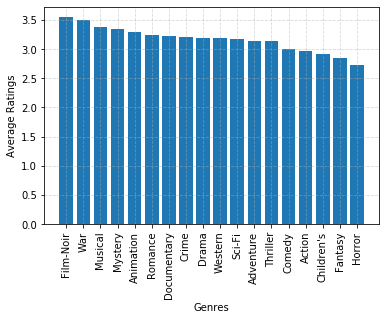

In [106]:
to_plot = Genres.sort_values(by=['Avg_Rating_by_Genre'],ascending=False)
plt.bar(to_plot['Genres'],to_plot['Avg_Rating_by_Genre'])
plt.xlabel('Genres')
plt.ylabel('Average Ratings')
plt.grid('on', linestyle='--', alpha = 0.5)
plt.xticks(rotation=90)

Film-Noir is the highest ranked genre with average of 3.54, while Horror films are the least liked genres.


#### Filter Data

In [116]:
model_df.set_index('movie_id',inplace = True)
model_df["genres"] = model_df.index.to_series().map(genre)
model_df.reset_index(inplace = True)

In [117]:
model_df.head()

,movie_id,user_id,rating,timestamp,age,gender,occupation,movie_title,Action,Adventure,...,Sci-Fi,Thriller,War,Western,movie_age,ratings_average,ratings_count,user_movie_count,user_rating_avg,genres
0,242,196,3,881250949,49,M,writer,Kolya (1996),0,0,...,0,0,0,0,23,3.991453,117,39,3.615385,[Comedy]
1,302,186,3,891717742,39,F,executive,L.A. Confidential (1997),0,0,...,0,1,0,0,23,4.161616,297,92,3.413043,"[Crime, Film-Noir, Mystery, Thriller]"
2,377,22,1,878887116,25,M,writer,Heavyweights (1994),0,0,...,0,0,0,0,26,2.153846,13,128,3.351562,"[Children's, Comedy]"
3,51,244,2,880606923,28,M,technician,Legends of the Fall (1994),0,0,...,0,0,1,1,26,3.456790,81,238,3.651261,"[Drama, Romance, War, Western]"
4,346,166,1,886397596,47,M,educator,Jackie Brown (1997),0,0,...,0,0,0,0,23,3.642857,126,20,3.550000,"[Crime, Drama]"


In [142]:
## Drop 10% of the movies which are not very popular. They are the movies with rating_counts >= 34.

threshold = 34
model_df_new = model_df[model_df['ratings_count'] >= threshold]
print('Shape of original ratings data: ', model_df.shape)
print('Shape of ratings data after dropping unpopular movies: ', model_df_new.shape)

Shape of original ratings data:  (99991, 32)
Shape of ratings data after dropping unpopular movies:  (90342, 32)


In [179]:
print(model_df['movie_id'].nunique() - model_df_new['movie_id'].nunique(), "movies are deleted")

919 movies are deleted


In [172]:
import pickle
# Store data
with open('model_df_new.pickle', 'wb') as handle:
    pickle.dump(model_df_new, handle, protocol=pickle.HIGHEST_PROTOCOL)